# Homework 1
Train a word2vec model using gensim. [This article](https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.YIc63H1KjUI) can provide a straightforward way for building a model simply with gensim.

After the model is built, take 20 words are random and plot them using ```tsnescatterplot()```. You can reuse the code we went through in class.

In [72]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

In [2]:
!wget https://storage.googleapis.com/nicksdemobucket/shakespeare.txt

--2022-05-08 17:36:18--  https://storage.googleapis.com/nicksdemobucket/shakespeare.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘shakespeare.txt’

shakespeare.txt     100%[===================>]   1.06M  --.-KB/s    in 0.01s   

2022-05-08 17:36:18 (86.7 MB/s) - ‘shakespeare.txt’ saved [1115394/1115394]



In [38]:
with open('shakespeare.txt', 'r') as file:
    shakespeare_text = file.read().replace('\n', ' ')

In [39]:
print(shakespeare_text[:150])

First Citizen: Before we proceed any further, hear me speak.  All: Speak, speak.  First Citizen: You are all resolved rather to die than to famish?  A


In [40]:
text  = gensim.utils.simple_preprocess(shakespeare_text)

In [41]:
text[:10]

['first',
 'citizen',
 'before',
 'we',
 'proceed',
 'any',
 'further',
 'hear',
 'me',
 'speak']

In [63]:
model = gensim.models.Word2Vec(
        size=300,
        window=3,
        min_count=2,
        workers=-1,
        iter=10)

In [64]:
model.build_vocab([text], progress_per=1000)


In [65]:
model.corpus_count

1

In [66]:
model.train(text, total_examples=model.corpus_count, epochs=30)


(0, 0)

In [67]:
model.init_sims(replace=True)

In [68]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

In [70]:
model.corpus_total_words

195977

In [89]:
import random
random_list = random.sample(text, 20)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


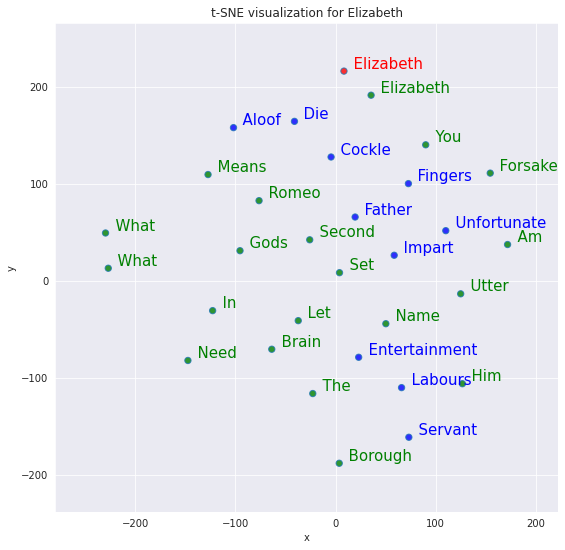

In [90]:
tsnescatterplot(model, random_list[2], random_list)